In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


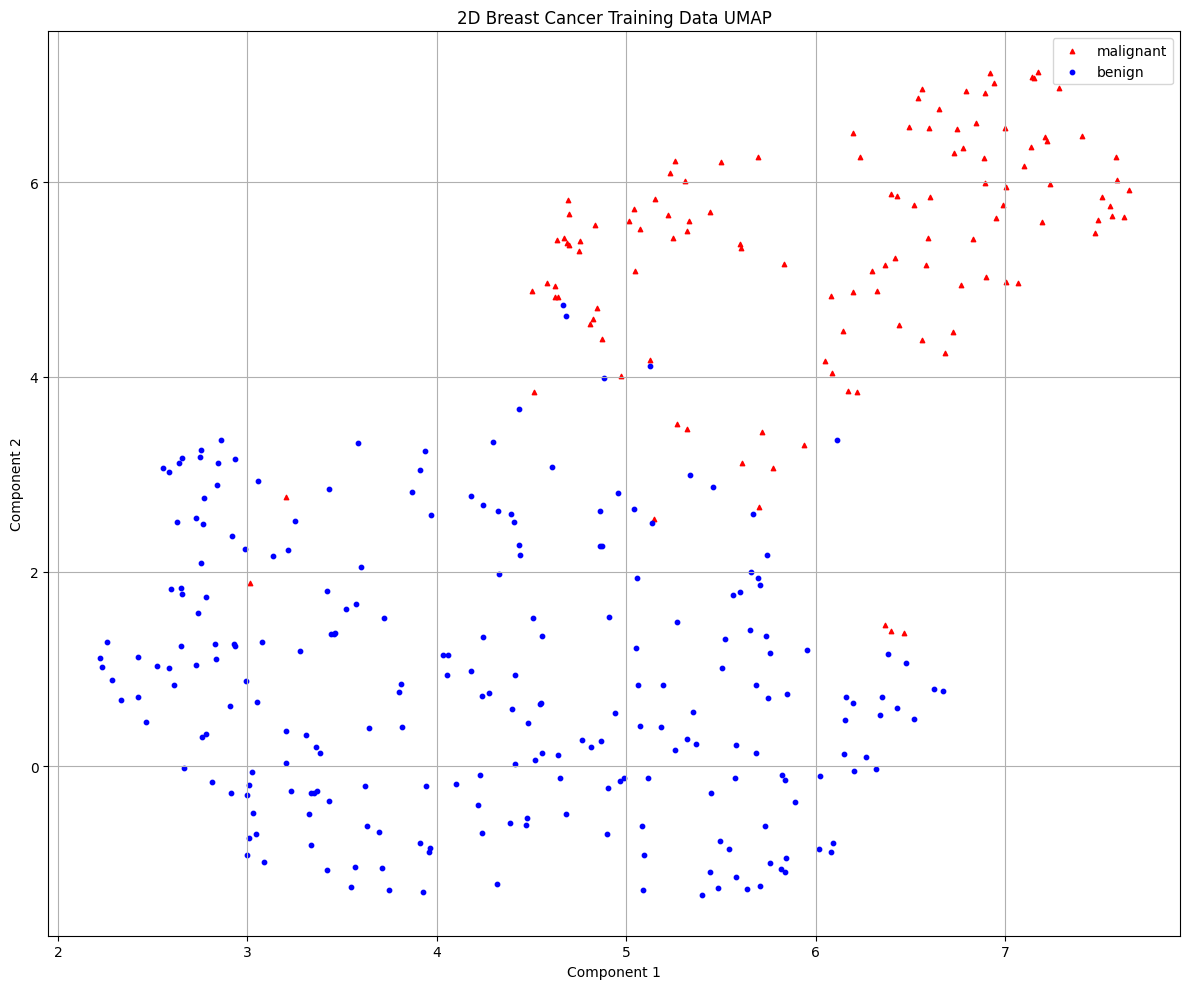

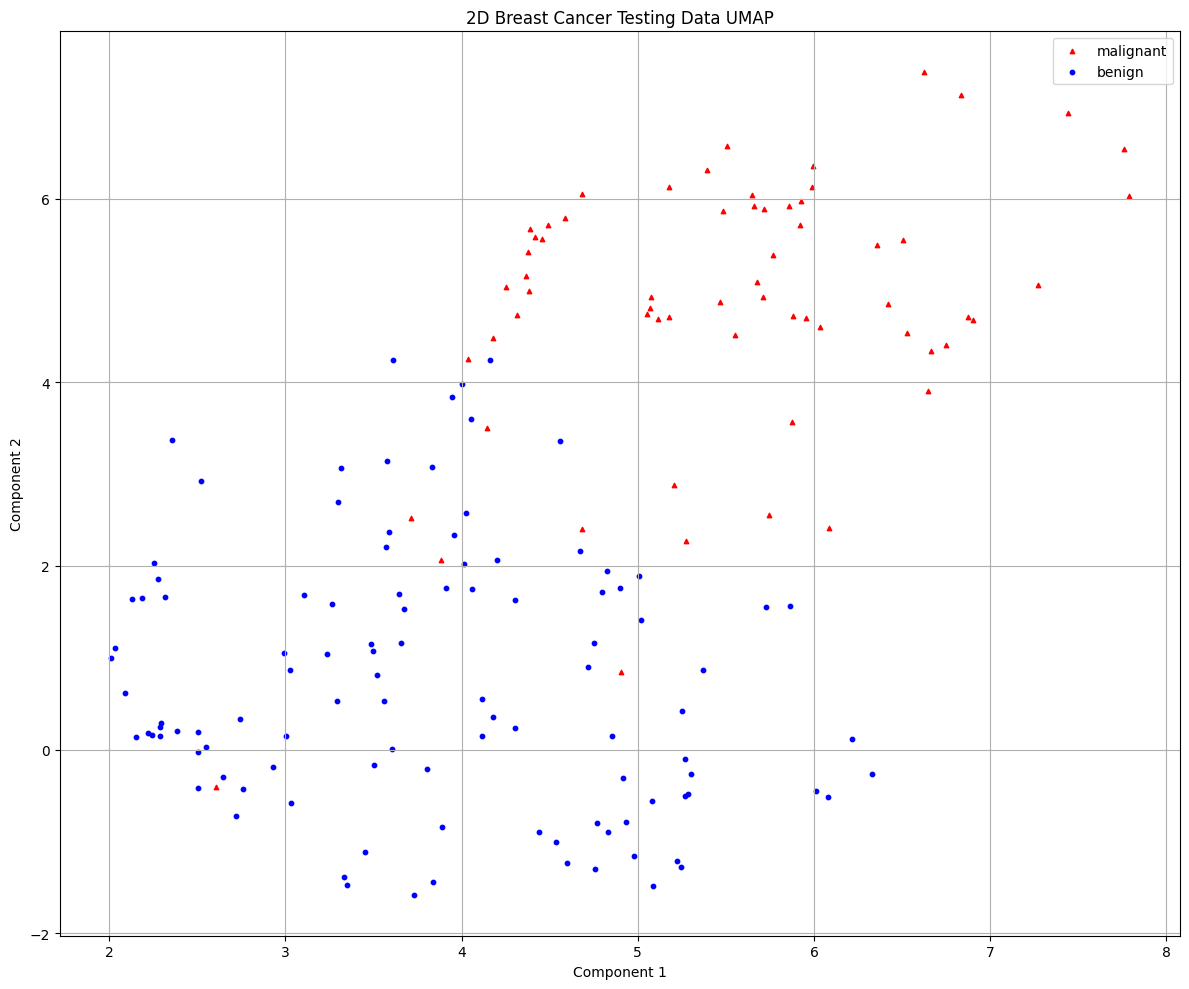

[I 2025-04-27 11:18:36,393] A new study created in memory with name: no-name-317365e0-2656-4471-95a3-87c0d537ff81
[I 2025-04-27 11:18:36,416] Trial 0 finished with value: 0.6638631790744467 and parameters: {'C': 0.6535952852803542, 'kernel': 'sigmoid', 'gamma': 0.00015761105675691155, 'max_iter': 8376}. Best is trial 0 with value: 0.6638631790744467.
[I 2025-04-27 11:18:36,445] Trial 1 finished with value: 0.6638631790744467 and parameters: {'C': 0.001262783956776258, 'kernel': 'rbf', 'gamma': 0.5228639636662389, 'max_iter': 9446}. Best is trial 0 with value: 0.6638631790744467.
[I 2025-04-27 11:18:36,459] Trial 2 finished with value: 0.9575855130784708 and parameters: {'C': 38.951889452095365, 'kernel': 'sigmoid', 'gamma': 0.0007356444633228088, 'max_iter': 3871}. Best is trial 2 with value: 0.9575855130784708.
[I 2025-04-27 11:18:36,478] Trial 3 finished with value: 0.5904627766599597 and parameters: {'C': 2.31834329640184, 'kernel': 'sigmoid', 'gamma': 0.023447878830837012, 'max_ite

Best trial:
Accuracy: 0.9661569416498995
Best hyperparameters:  {'C': 0.4333415250284915, 'kernel': 'linear', 'max_iter': 2381}


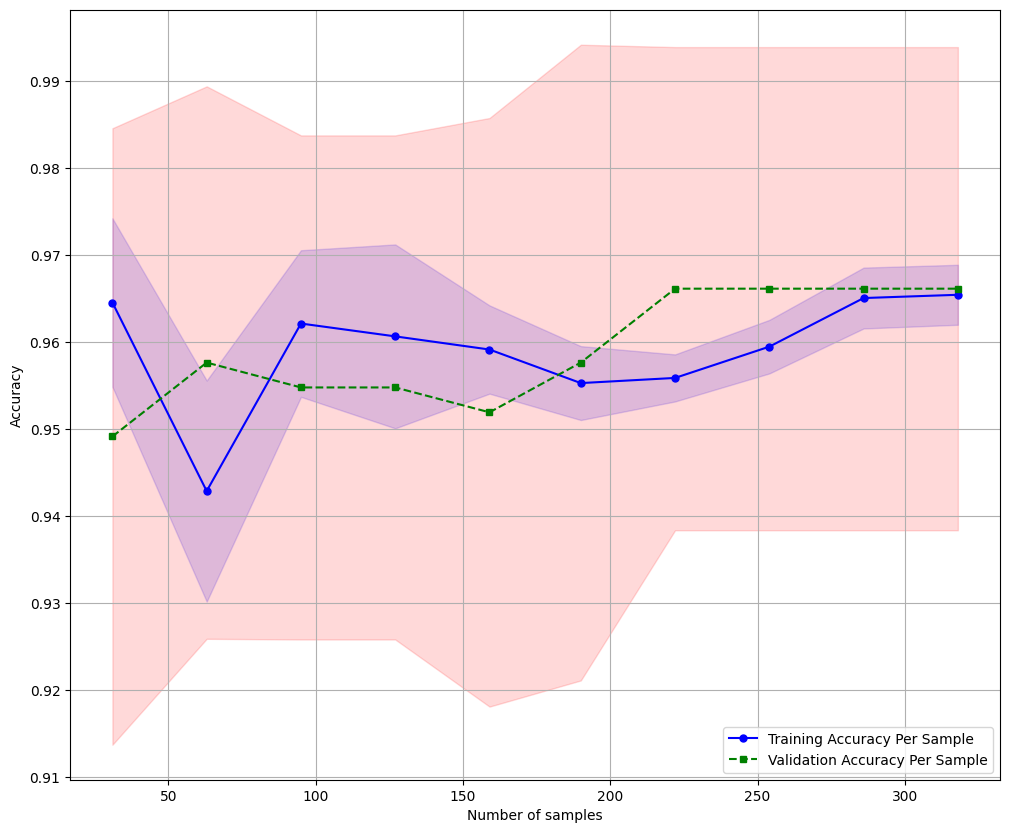

Confusion Matrix
[[ 54  10]
 [  1 106]]
Accuracy: 0.9357, Precision: 0.9138, Recall: 0.9907, F1: 0.9507, AUC: 0.9704


In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)